In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = sns.load_dataset("taxis")

In [3]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [4]:
data.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

## Checking null values

In [6]:
data.isnull()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6429,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6430,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

## Change Column Names (borough to city) 

In [8]:
data.rename(columns={
    'pickup_borough': 'pickup_city',
    'dropoff_borough': 'dropoff_city'
}, inplace=True)


In [9]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_city,dropoff_city
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [10]:
data.isnull().any()

pickup          False
dropoff         False
passengers      False
distance        False
fare            False
tip             False
tolls           False
total           False
color           False
payment          True
pickup_zone      True
dropoff_zone     True
pickup_city      True
dropoff_city     True
dtype: bool

## Null data columns

In [11]:
data[data.isnull().any(axis=1)]


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_city,dropoff_city
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.4,8.5,0.00,0.0,11.80,yellow,NaN,Murray Hill,Flatiron,Manhattan,Manhattan
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.0,100.38,yellow,credit card,NaN,NaN,NaN,NaN
445,2019-03-19 06:57:14,2019-03-19 07:00:08,1,1.3,5.5,0.00,0.0,6.30,yellow,NaN,Boerum Hill,Columbia Street,Brooklyn,Brooklyn
491,2019-03-07 07:11:33,2019-03-07 07:11:39,1,1.6,2.5,0.00,0.0,5.80,yellow,NaN,Murray Hill,Murray Hill,Manhattan,Manhattan
545,2019-03-27 11:03:43,2019-03-27 11:14:34,1,4.2,15.0,0.00,0.0,15.80,yellow,NaN,LaGuardia Airport,Forest Hills,Queens,Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,2019-03-30 00:49:48,2019-03-30 00:49:56,1,0.0,25.0,0.00,0.0,25.50,green,credit card,Prospect Heights,NaN,Brooklyn,NaN
6169,2019-03-27 02:11:01,2019-03-27 02:12:03,1,4.1,3.0,0.00,0.0,4.30,green,NaN,Jackson Heights,Jackson Heights,Queens,Queens
6311,2019-03-12 07:10:30,2019-03-12 07:14:18,1,0.7,4.5,0.00,0.0,5.30,green,NaN,Long Island City/Hunters Point,Long Island City/Hunters Point,Queens,Queens
6314,2019-03-28 22:36:04,2019-03-28 22:36:07,1,0.0,25.0,0.00,0.0,25.00,green,cash,Jamaica,NaN,Queens,NaN


In [12]:
data.shape

(6433, 14)

In [13]:
data['payment'].mode()


0    credit card
Name: payment, dtype: object

## Replacing null values columns to most common values

In [14]:
data['payment'].fillna(data['payment'].mode()[0], inplace=True)


C:\Users\Win 11\AppData\Local\Temp\ipykernel_17624\2031952462.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['payment'].fillna(data['payment'].mode()[0], inplace=True)


In [15]:
data['pickup_zone'].fillna(data['pickup_zone'].mode()[0], inplace=True)


C:\Users\Win 11\AppData\Local\Temp\ipykernel_17624\2516156696.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['pickup_zone'].fillna(data['pickup_zone'].mode()[0], inplace=True)


In [16]:
data['dropoff_zone'].fillna(data['dropoff_zone'].mode()[0], inplace=True)


C:\Users\Win 11\AppData\Local\Temp\ipykernel_17624\2811178939.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['dropoff_zone'].fillna(data['dropoff_zone'].mode()[0], inplace=True)


In [17]:
data['pickup_city'].fillna(data['pickup_city'].mode()[0], inplace=True)


C:\Users\Win 11\AppData\Local\Temp\ipykernel_17624\1955404556.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['pickup_city'].fillna(data['pickup_city'].mode()[0], inplace=True)


In [18]:
data['dropoff_city'].fillna(data['dropoff_city'].mode()[0], inplace=True)


C:\Users\Win 11\AppData\Local\Temp\ipykernel_17624\2414872508.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['dropoff_city'].fillna(data['dropoff_city'].mode()[0], inplace=True)


In [19]:
data.isnull().sum()

pickup          0
dropoff         0
passengers      0
distance        0
fare            0
tip             0
tolls           0
total           0
color           0
payment         0
pickup_zone     0
dropoff_zone    0
pickup_city     0
dropoff_city    0
dtype: int64

## All Null Values are Fixed 

In [20]:
data.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_city', 'dropoff_city'],
      dtype='object')

In [21]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_city,dropoff_city
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [22]:
data.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [23]:
data['pickup_date'] = data['pickup'].dt.day

In [24]:
data['date'] = data['pickup'].dt.date

In [25]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_city,dropoff_city,pickup_date,date
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,23,2019-03-23
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,4,2019-03-04
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,27,2019-03-27
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,10,2019-03-10
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,30,2019-03-30


In [26]:
data.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_city', 'dropoff_city', 'pickup_date', 'date'],
      dtype='object')

In [27]:
data['month'] = data['pickup'].dt.month_name()

In [28]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_city,dropoff_city,pickup_date,date,month
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,23,2019-03-23,March
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,4,2019-03-04,March
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,27,2019-03-27,March
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,10,2019-03-10,March
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,30,2019-03-30,March


In [29]:
data.groupby('month').size()

month
February       1
March       6432
dtype: int64

In [30]:
taxi_count = data.groupby('date').size().reset_index(name = "taxi_count")

In [31]:
taxi_count['date'] = pd.to_datetime(taxi_count['date']).dt.strftime('%d-%m')


In [32]:
taxi_count

,date,taxi_count
0,28-02,1
1,01-03,241
2,02-03,198
3,03-03,169
4,04-03,171
5,05-03,228
6,06-03,257
7,07-03,218
8,08-03,235
9,09-03,204


### Daily taxi trend

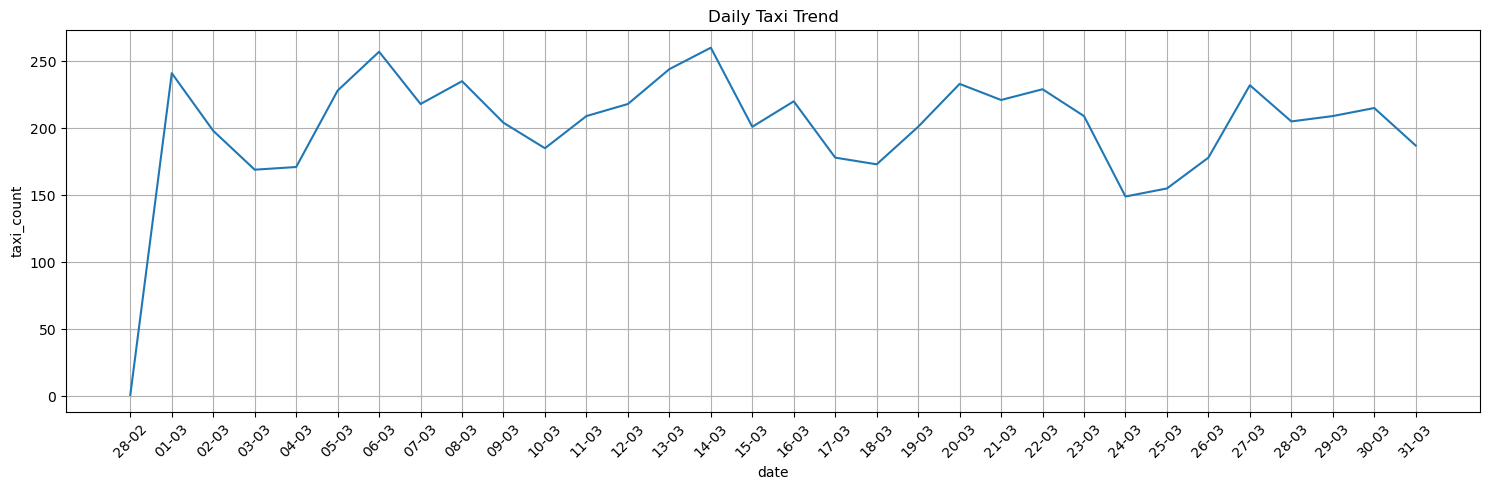

In [33]:
plt.figure(figsize=(15,5)) 
sns.lineplot(x="date", y="taxi_count", data=taxi_count)

plt.xticks(rotation=45)
plt.title("Daily Taxi Trend")
plt.tight_layout()
plt.grid()
plt.savefig("daily_trend.png", dpi=300)
plt.show()

In [34]:
data['hour'] = data['pickup'].dt.hour
taxi_hours = data.groupby('hour').size().reset_index(name='taxi_count')
taxi_hours


,hour,taxi_count
0,0,205
1,1,110
2,2,101
3,3,67
4,4,57
5,5,51
6,6,142
7,7,221
8,8,313
9,9,319


# Hourly Trend Of taxis

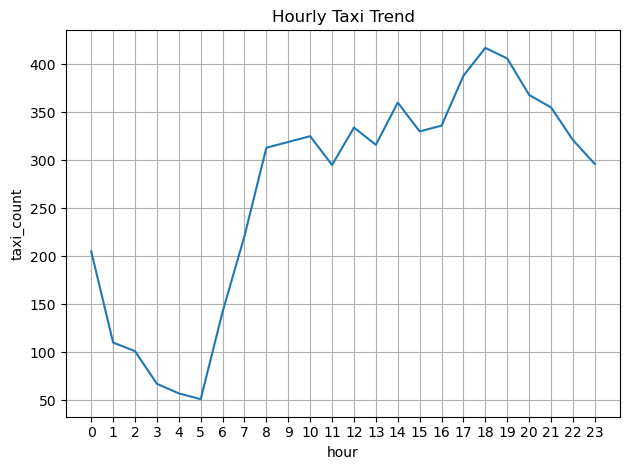

In [35]:
sns.lineplot(x="hour", y="taxi_count", data = taxi_hours)
plt.xticks(range(0,24,1))
plt.title("Hourly Taxi Trend")
plt.tight_layout()
plt.grid()
plt.savefig("Hourly_trend.png", dpi=300)
plt.show()

# Observation:
### 1. Mostly Taxis are booked after 8AM
### 2. Peak Hpurs are from 4PM To Midnight

In [36]:
paymnet_mode = data.groupby('payment').size().reset_index(name = 'count')

In [37]:
paymnet_mode

,payment,count
0,cash,1812
1,credit card,4621


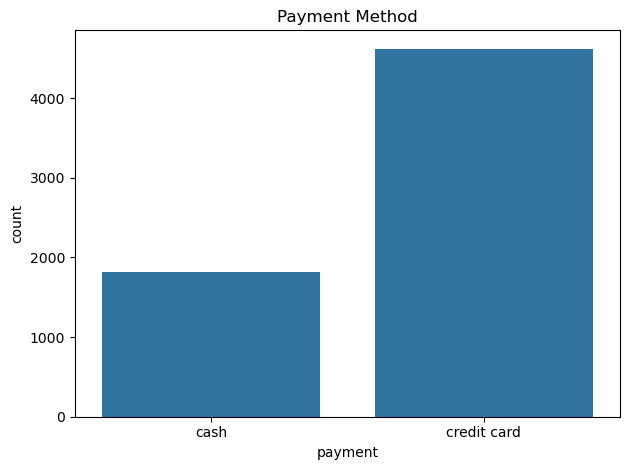

In [38]:
sns.barplot(x='payment', y='count', data = paymnet_mode)
plt.title('Payment Method')
plt.tight_layout()
plt.savefig("Pay_Mode.png", dpi =300)
plt.show()

## Credit Card is Mostly Used Payment Method

In [39]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_city,dropoff_city,pickup_date,date,month,hour
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,23,2019-03-23,March,20
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,4,2019-03-04,March,16
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,27,2019-03-27,March,17
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,10,2019-03-10,March,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,30,2019-03-30,March,13


In [40]:
len(data['pickup_zone'].unique())

194

In [41]:
most_pick_zone = data.groupby('pickup_zone')['pickup'].count().reset_index(name = 'pickup_count')

In [42]:
most_pick_zone['Rank'] = most_pick_zone['pickup_count'].rank(ascending = False)

In [43]:
most_pick_zone.sort_values('Rank')[:10]

,pickup_zone,pickup_count,Rank
115,Midtown Center,256,1.0
172,Upper East Side South,211,2.0
134,Penn Station/Madison Sq West,210,3.0
32,Clinton East,208,4.0
116,Midtown East,198,5.0
171,Upper East Side North,186,6.0
165,Times Sq/Theatre District,184,7.0
169,Union Sq,180,8.0
100,Lincoln Square East,177,9.0
124,Murray Hill,162,10.0


In [44]:
most_dropoff_zone = data.groupby('dropoff_zone')['pickup'].count().reset_index(name = 'dropoff_count')

In [45]:
most_dropoff_zone['Rank'] = most_dropoff_zone['dropoff_count'].rank(ascending = False)

In [46]:
most_dropoff_zone.sort_values('Rank')[:10]

,dropoff_zone,dropoff_count,Rank
179,Upper East Side North,290,1.0
128,Murray Hill,220,2.0
119,Midtown Center,215,3.0
180,Upper East Side South,177,4.0
120,Midtown East,176,5.0
173,Times Sq/Theatre District,160,6.0
103,Lincoln Square East,156,7.0
34,Clinton East,151,8.0
60,East Village,150,9.0
139,Penn Station/Madison Sq West,148,10.0


## Most Pickups and Dropoff Zones are given above

In [47]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_city,dropoff_city,pickup_date,date,month,hour
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,23,2019-03-23,March,20
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,4,2019-03-04,March,16
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,27,2019-03-27,March,17
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,10,2019-03-10,March,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,30,2019-03-30,March,13


In [48]:
data.groupby('pickup_city')['pickup'].count().idxmax()

'Manhattan'

In [49]:
data.groupby('dropoff_city')['pickup'].count().idxmax()

'Manhattan'

## Mostly pickups and dropoffs are in Manhattan city

In [50]:
data['distance'].mean()

np.float64(3.024616819524328)

In [51]:
data.groupby(['distance','fare'])['pickup'].count()

distance  fare 
0.00      2.5      21
          3.0       3
          3.5       1
          4.0       2
          5.0       1
                   ..
30.23     52.0      1
33.46     150.0     1
33.76     143.5     1
36.66     96.5      1
36.70     150.0     1
Name: pickup, Length: 3455, dtype: int64

In [52]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_city,dropoff_city,pickup_date,date,month,hour
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,23,2019-03-23,March,20
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,4,2019-03-04,March,16
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,27,2019-03-27,March,17
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,10,2019-03-10,March,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,30,2019-03-30,March,13


In [59]:
data['day_type'] = data['pickup'].dt.weekday.apply(
    lambda x: 'Weekend' if x >= 5 else 'Weekday'
)

In [60]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_city,dropoff_city,pickup_date,date,month,hour,day_type
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,23,2019-03-23,March,20,Weekend
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,4,2019-03-04,March,16,Weekday
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,27,2019-03-27,March,17,Weekday
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,10,2019-03-10,March,1,Weekend
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,30,2019-03-30,March,13,Weekend


In [69]:
day_type_data = data.groupby('day_type')['total'].sum()

In [70]:
day_type_data

day_type
Weekday    85402.04
Weekend    33722.93
Name: total, dtype: float64

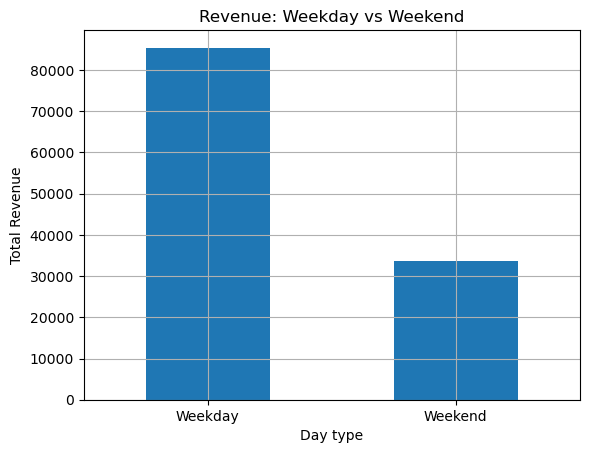

In [80]:
day_type_data.plot(kind='bar')
plt.xticks(rotation = 0)
plt.ylabel("Total Revenue")
plt.xlabel("Day type")
plt.title("Revenue: Weekday vs Weekend")
plt.grid()
plt.savefig("weekdays_vs_weekends.png",dpi = 300)
plt.show()

## Observation
### people are using taxis on weekdays more than weekends.

In [81]:
total_rev = data['total'].sum()

In [82]:
total_rev

np.float64(119124.97)

In [83]:
day_type_data.plot(kind='bar')
plt.xticks(rotation = 0)
plt.ylabel("Total Revenue")
plt.xlabel("Day type")
plt.title("Revenue: Weekday vs Weekend")
plt.grid()
plt.savefig("weekdays_vs_weekends.png",dpi = 300)
plt.show()

In [86]:
company_wise_rev = data.groupby('color')['total'].sum()

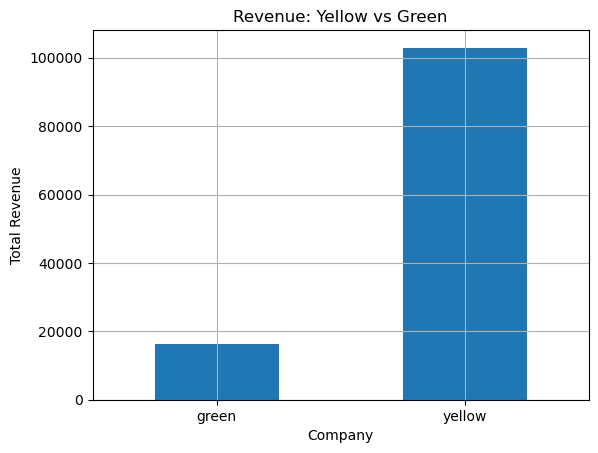

In [87]:
company_wise_rev.plot(kind='bar')
plt.xticks(rotation = 0)
plt.ylabel("Total Revenue")
plt.xlabel("Company")
plt.title("Revenue: Yellow vs Green")
plt.grid()
plt.savefig("Company_revenue.png",dpi = 300)
plt.show()

In [91]:
#Top 10 Pickup Zones by Revenue
data.groupby('pickup_zone')['total'].sum().sort_values(ascending = False)[:10]

pickup_zone
JFK Airport                     8355.88
LaGuardia Airport               6268.36
Midtown Center                  5123.19
Penn Station/Madison Sq West    3652.63
Times Sq/Theatre District       3428.10
Midtown East                    3400.49
Clinton East                    3304.37
Union Sq                        3068.70
Lincoln Square East             3044.48
Upper East Side South           2963.19
Name: total, dtype: float64

In [92]:
#Top 10 dropoff Zones by Revenue
data.groupby('dropoff_zone')['total'].sum().sort_values(ascending = False)[:10]

dropoff_zone
Upper East Side North        6129.19
Midtown Center               3841.32
Murray Hill                  3489.44
JFK Airport                  3472.51
Midtown East                 3059.96
LaGuardia Airport            2883.18
Upper East Side South        2814.34
Times Sq/Theatre District    2701.22
Clinton East                 2681.62
East Village                 2588.18
Name: total, dtype: float64

In [93]:
#Top Pickup city by Revenue
data.groupby('pickup_city')['total'].sum().sort_values(ascending = False)[:10]

pickup_city
Manhattan    88703.04
Queens       20800.69
Brooklyn      7367.48
Bronx         2253.76
Name: total, dtype: float64

In [94]:
#Top dropoff city by Revenue
data.groupby('dropoff_city')['total'].sum().sort_values(ascending = False)[:10]

dropoff_city
Manhattan        89791.52
Queens           14098.81
Brooklyn         11646.87
Bronx             3434.04
Staten Island      153.73
Name: total, dtype: float64

In [95]:
data['passengers'].mean()

np.float64(1.539250738380227)

### Almost 2 passengers book taxi everytime

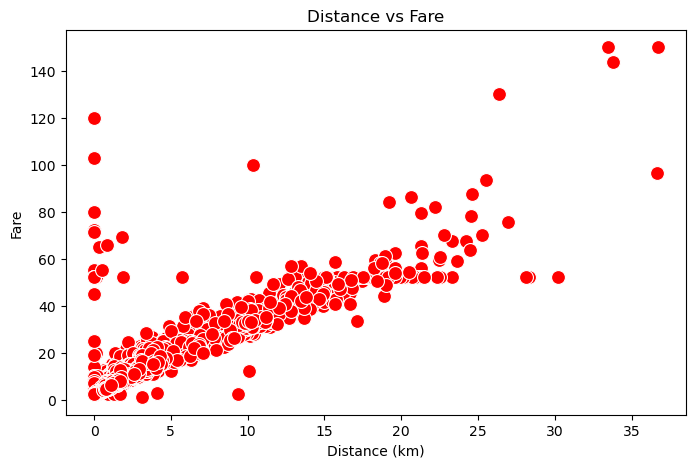

In [101]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='distance', y='fare', data=data, color = 'red', s= 100)
plt.title("Distance vs Fare")
plt.xlabel("Distance (km)")
plt.ylabel("Fare")
plt.savefig("dist_vs_fare.png", dpi = 300)
plt.show()

## Distance Vs Fare

In [133]:
data = data[data['fare'] > 0]
data['tip_percentage'] =(data['tip']/data['fare'])*100
data['tip_percentage'].sort_values(ascending = False)[:20]

2923    93.333333
3272    90.909091
4912    90.909091
2223    80.000000
1995    80.000000
213     75.000000
6096    71.428571
644     66.666667
4970    61.428571
2896    60.000000
2338    58.666667
4060    58.666667
4871    58.500000
689     58.500000
1520    58.500000
472     58.500000
1254    58.285714
3375    57.777778
864     57.142857
3434    57.142857
Name: tip_percentage, dtype: float64

In [120]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_city,dropoff_city,pickup_date,date,month,hour,day_type,tip_percentage
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,23,2019-03-23,March,20,Weekend,30.714286
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,4,2019-03-04,March,16,Weekday,0.000000
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,27,2019-03-27,March,17,Weekday,31.466667
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,10,2019-03-10,March,1,Weekend,22.777778
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,30,2019-03-30,March,13,Weekend,12.222222


In [121]:
data['tip_percentage'].describe()

count    6433.000000
mean       16.920288
std        14.598213
min         0.000000
25%         0.000000
50%        21.052632
75%        28.333333
max        93.333333
Name: tip_percentage, dtype: float64

## Average tip amount is 17% of fare

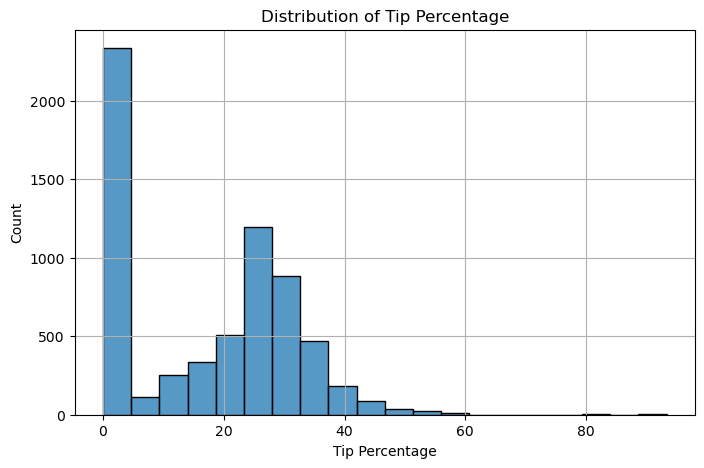

In [134]:
plt.figure(figsize=(8,5))
sns.histplot(data['tip_percentage'], bins=20)
plt.title("Distribution of Tip Percentage")
plt.xlabel("Tip Percentage")
plt.ylabel("Count")
plt.grid()
plt.savefig("avg_tip_percentage.png", dpi = 300)
plt.show()


# EDA Completed